In [33]:
## use gini by default
## entropy uses log becomes heavy when number of datapoints increase

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
from sklearn.datasets import load_iris

In [36]:
iris = load_iris()

In [37]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [38]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
# independent features
X=pd.DataFrame(iris['data'], columns = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm'])
# dep features
y = pd.DataFrame(iris['target'])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
treeclassifier = DecisionTreeClassifier()

In [43]:
treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),

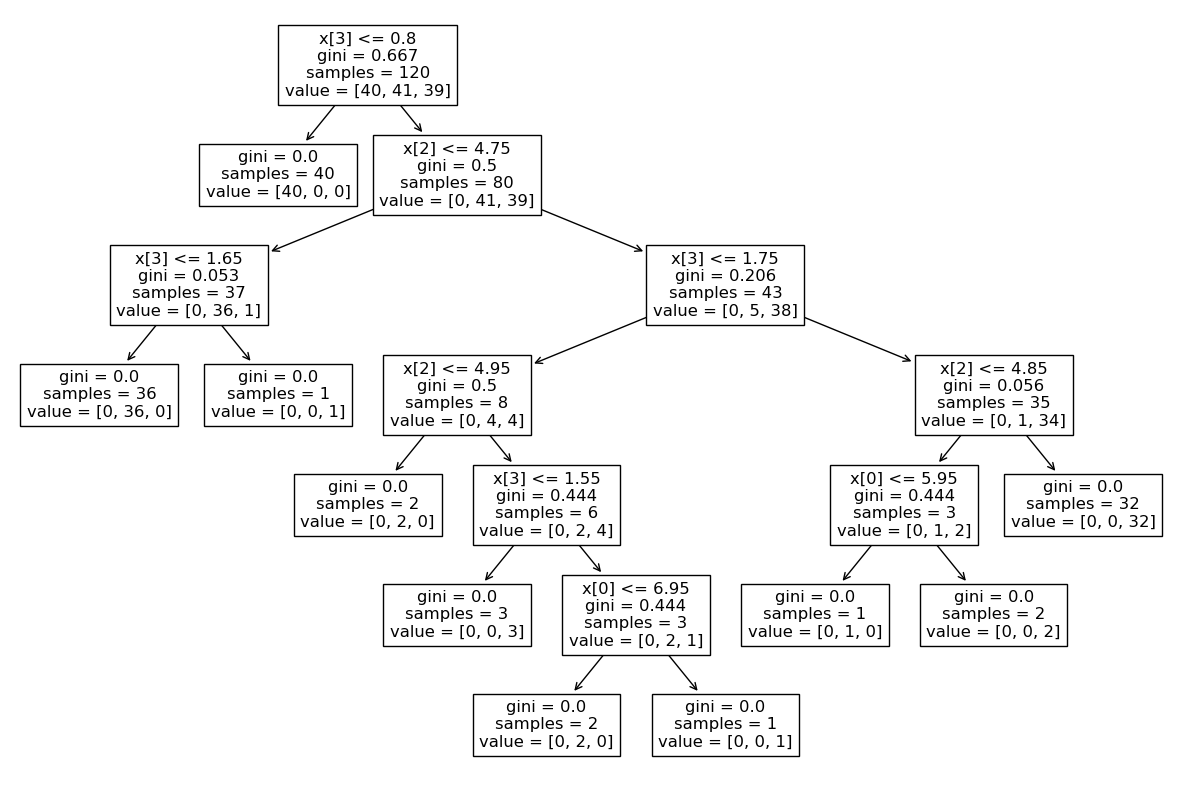

In [44]:
from sklearn.tree import plot_tree

plt.figure(figsize = (15,10))
plot_tree(treeclassifier)

In [45]:
## here when we let the whole tree build we would have to use post pruning yo cut off thee tree
## we can also use paramters like : max depth , gini entorpy , max-features to preprune

In [46]:
## in postpruning we let the whole tree build
## we say that we have to leave max depth =2 

In [47]:
 ## we have to stop building after it 

In [48]:
treeclassifier_2 = DecisionTreeClassifier(max_depth = 2)

In [50]:
treeclassifier_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]')]

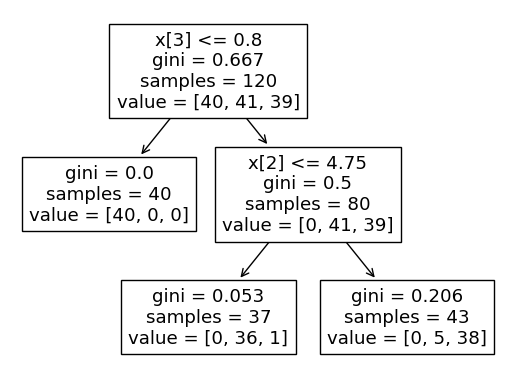

In [51]:
plot_tree(treeclassifier_2)

In [53]:
y_pred = treeclassifier_2.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix , classification_report

In [57]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [58]:
## post pruning only good for small data set

### decision tree pruning and hyperparam tuning

In [61]:
params = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth' : [1, 2, 3 ,4, 5],
    # the number of features to look while looking for best split
    'max_features' : ['auto','log2']
}

In [62]:
params

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'log2']}

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
treeclassifier = DecisionTreeClassifier()

In [66]:
grid = GridSearchCV(treeclassifier, param_grid = params, cv = 5, scoring = 'accuracy')

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [72]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [74]:
grid.best_score_

0.95

In [75]:
y_pred = grid.predict(X_test)

In [77]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

1.0

In [81]:
## hyperparam tuning of pre pruning tree